# Activity: Manual Feature Extraction using TF-IDF

## Given Corpus

- **D1**: "Business intelligence improves decision making"
- **D2**: "Decision support systems assist managers"
- **D3**: "Business analytics supports data driven decision making"

---

## Objective
Manually compute TF-IDF values for selected terms through step-by-step calculations.

## Step 1: Text Preprocessing

We need to:
- Remove stop words (e.g., the, and, is, of)
- Convert to lowercase
- Apply basic stemming

In [1]:
# Original documents
documents = {
    'D1': "Business intelligence improves decision making",
    'D2': "Decision support systems assist managers",
    'D3': "Business analytics supports data driven decision making"
}

# Common stop words to remove
stop_words = {'the', 'and', 'is', 'of', 'a', 'an', 'in', 'to', 'for', 'with'}

# Simple stemming rules (manual mapping)
stemming_rules = {
    'supports': 'support',
    'systems': 'system',
    'making': 'make',
    'improves': 'improve',
    'driven': 'drive',
    'managers': 'manager',
    'analytics': 'analytic'
}

def preprocess_text(text):
    """Preprocess text: lowercase, remove stop words, apply stemming"""
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize (split by spaces and remove punctuation)
    words = text.replace(',', '').replace('.', '').split()
    
    # Remove stop words
    words = [word for word in words if word not in stop_words]
    
    # Apply stemming
    words = [stemming_rules.get(word, word) for word in words]
    
    return words

# Preprocess all documents
preprocessed_docs = {}
for doc_id, text in documents.items():
    preprocessed_docs[doc_id] = preprocess_text(text)
    
# Display results
print("=" * 60)
print("PREPROCESSED DOCUMENTS")
print("=" * 60)
for doc_id, words in preprocessed_docs.items():
    print(f"\n{doc_id}: {documents[doc_id]}")
    print(f"After preprocessing: {' '.join(words)}")
    print(f"Terms: {words}")

PREPROCESSED DOCUMENTS

D1: Business intelligence improves decision making
After preprocessing: business intelligence improve decision make
Terms: ['business', 'intelligence', 'improve', 'decision', 'make']

D2: Decision support systems assist managers
After preprocessing: decision support system assist manager
Terms: ['decision', 'support', 'system', 'assist', 'manager']

D3: Business analytics supports data driven decision making
After preprocessing: business analytic support data drive decision make
Terms: ['business', 'analytic', 'support', 'data', 'drive', 'decision', 'make']


## Step 2: Create Bag-of-Words (BOW) Matrix

Build vocabulary and document-term frequency table.

In [2]:
import pandas as pd
from collections import Counter

# Create vocabulary (all unique terms)
vocabulary = set()
for words in preprocessed_docs.values():
    vocabulary.update(words)

vocabulary = sorted(vocabulary)  # Sort alphabetically

print("=" * 60)
print("VOCABULARY (All unique terms after preprocessing)")
print("=" * 60)
print(f"Total unique terms: {len(vocabulary)}")
print(f"Terms: {vocabulary}\n")

# Create BOW matrix (term frequency)
bow_matrix = {}
for doc_id, words in preprocessed_docs.items():
    term_freq = Counter(words)
    bow_matrix[doc_id] = {term: term_freq.get(term, 0) for term in vocabulary}

# Display as DataFrame
bow_df = pd.DataFrame(bow_matrix).T
print("=" * 60)
print("BAG-OF-WORDS MATRIX (Term Frequency)")
print("=" * 60)
print(bow_df)
print("\n")

VOCABULARY (All unique terms after preprocessing)
Total unique terms: 12
Terms: ['analytic', 'assist', 'business', 'data', 'decision', 'drive', 'improve', 'intelligence', 'make', 'manager', 'support', 'system']

BAG-OF-WORDS MATRIX (Term Frequency)
    analytic  assist  business  data  decision  drive  improve  intelligence  \
D1         0       0         1     0         1      0        1             1   
D2         0       1         0     0         1      0        0             0   
D3         1       0         1     1         1      1        0             0   

    make  manager  support  system  
D1     1        0        0       0  
D2     0        1        1       1  
D3     1        0        1       0  




## Step 3: Compute TF-IDF Manually

### Formulas:

**Term Frequency (TF):**
$$TF(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}$$

**Inverse Document Frequency (IDF):**
$$IDF(t) = \log\left(\frac{\text{Total number of documents}}{\text{Number of documents containing term } t}\right)$$

**TF-IDF:**
$$TF\text{-}IDF(t, d) = TF(t, d) \times IDF(t)$$

In [3]:
import math

# Calculate TF for each term in each document
tf_matrix = {}
for doc_id, words in preprocessed_docs.items():
    total_terms = len(words)
    term_freq = Counter(words)
    tf_matrix[doc_id] = {term: term_freq.get(term, 0) / total_terms for term in vocabulary}

# Display TF matrix
tf_df = pd.DataFrame(tf_matrix).T
print("=" * 80)
print("TERM FREQUENCY (TF) MATRIX")
print("=" * 80)
print(tf_df.round(4))
print("\n")

# Calculate IDF for each term
total_docs = len(preprocessed_docs)
idf_values = {}

for term in vocabulary:
    # Count documents containing this term
    docs_containing_term = sum(1 for words in preprocessed_docs.values() if term in words)
    idf_values[term] = math.log(total_docs / docs_containing_term) if docs_containing_term > 0 else 0

# Display IDF values
idf_df = pd.DataFrame([idf_values], index=['IDF'])
print("=" * 80)
print("INVERSE DOCUMENT FREQUENCY (IDF) VALUES")
print("=" * 80)
print(f"Total documents: {total_docs}\n")
print(idf_df.round(4))
print("\n")

# Calculate TF-IDF
tfidf_matrix = {}
for doc_id in preprocessed_docs.keys():
    tfidf_matrix[doc_id] = {term: tf_matrix[doc_id][term] * idf_values[term] for term in vocabulary}

# Display TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix).T
print("=" * 80)
print("TF-IDF MATRIX")
print("=" * 80)
print(tfidf_df.round(4))
print("\n")

TERM FREQUENCY (TF) MATRIX
    analytic  assist  business    data  decision   drive  improve  \
D1    0.0000     0.0    0.2000  0.0000    0.2000  0.0000      0.2   
D2    0.0000     0.2    0.0000  0.0000    0.2000  0.0000      0.0   
D3    0.1429     0.0    0.1429  0.1429    0.1429  0.1429      0.0   

    intelligence    make  manager  support  system  
D1           0.2  0.2000      0.0   0.0000     0.0  
D2           0.0  0.0000      0.2   0.2000     0.2  
D3           0.0  0.1429      0.0   0.1429     0.0  


INVERSE DOCUMENT FREQUENCY (IDF) VALUES
Total documents: 3

     analytic  assist  business    data  decision   drive  improve  \
IDF    1.0986  1.0986    0.4055  1.0986       0.0  1.0986   1.0986   

     intelligence    make  manager  support  system  
IDF        1.0986  0.4055   1.0986   0.4055  1.0986  


TF-IDF MATRIX
    analytic  assist  business    data  decision   drive  improve  \
D1    0.0000  0.0000    0.0811  0.0000       0.0  0.0000   0.2197   
D2    0.0000  0.219

## Step 4: Detailed Computations for Selected Words

Computing step-by-step TF, IDF, and TF-IDF for:
- (a) business
- (b) making (after stemming: "make")
- (c) support
- (d) data
- (e) system

In [4]:
# Selected words to analyze (note: 'making' becomes 'make' after stemming)
selected_words = ['business', 'make', 'support', 'data', 'system']

print("=" * 80)
print("DETAILED STEP-BY-STEP CALCULATIONS FOR SELECTED WORDS")
print("=" * 80)

for word in selected_words:
    print(f"\n{'='*80}")
    print(f"WORD: '{word}' {'(stemmed from: making)' if word == 'make' else ''}")
    print(f"{'='*80}\n")
    
    # Show which documents contain this word
    docs_with_word = [doc_id for doc_id, words in preprocessed_docs.items() if word in words]
    print(f"Documents containing '{word}': {docs_with_word}")
    print(f"Number of documents containing '{word}': {len(docs_with_word)} out of {total_docs}\n")
    
    # Calculate IDF
    docs_containing = len(docs_with_word)
    idf = math.log(total_docs / docs_containing) if docs_containing > 0 else 0
    print(f"IDF Calculation:")
    print(f"  IDF('{word}') = log(Total docs / Docs containing term)")
    print(f"  IDF('{word}') = log({total_docs} / {docs_containing})")
    print(f"  IDF('{word}') = {idf:.6f}\n")
    
    # Calculate TF and TF-IDF for each document
    print(f"TF and TF-IDF Calculations per Document:")
    print(f"{'-'*80}")
    
    for doc_id, words in preprocessed_docs.items():
        count = words.count(word)
        total_terms = len(words)
        tf = count / total_terms if total_terms > 0 else 0
        tfidf = tf * idf
        
        print(f"\n  {doc_id}: {' '.join(words)}")
        print(f"    Total terms in {doc_id}: {total_terms}")
        print(f"    Count of '{word}' in {doc_id}: {count}")
        print(f"    TF('{word}', {doc_id}) = {count} / {total_terms} = {tf:.6f}")
        print(f"    TF-IDF('{word}', {doc_id}) = {tf:.6f} × {idf:.6f} = {tfidf:.6f}")
    
    print(f"\n{'-'*80}")

DETAILED STEP-BY-STEP CALCULATIONS FOR SELECTED WORDS

WORD: 'business' 

Documents containing 'business': ['D1', 'D3']
Number of documents containing 'business': 2 out of 3

IDF Calculation:
  IDF('business') = log(Total docs / Docs containing term)
  IDF('business') = log(3 / 2)
  IDF('business') = 0.405465

TF and TF-IDF Calculations per Document:
--------------------------------------------------------------------------------

  D1: business intelligence improve decision make
    Total terms in D1: 5
    Count of 'business' in D1: 1
    TF('business', D1) = 1 / 5 = 0.200000
    TF-IDF('business', D1) = 0.200000 × 0.405465 = 0.081093

  D2: decision support system assist manager
    Total terms in D2: 5
    Count of 'business' in D2: 0
    TF('business', D2) = 0 / 5 = 0.000000
    TF-IDF('business', D2) = 0.000000 × 0.405465 = 0.000000

  D3: business analytic support data drive decision make
    Total terms in D3: 7
    Count of 'business' in D3: 1
    TF('business', D3) = 1 / 7 = 

## Step 5: Summary Table for Selected Words

In [5]:
# Create summary table for selected words
summary_data = []

for word in selected_words:
    row = {'Word': word, 'IDF': idf_values.get(word, 0)}
    for doc_id in ['D1', 'D2', 'D3']:
        row[f'{doc_id}_TF'] = tf_matrix[doc_id].get(word, 0)
        row[f'{doc_id}_TFIDF'] = tfidf_matrix[doc_id].get(word, 0)
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.set_index('Word')

print("=" * 100)
print("SUMMARY TABLE - TF-IDF VALUES FOR SELECTED WORDS")
print("=" * 100)
print(summary_df.round(6))
print("\n")

# Highlight maximum TF-IDF values per document
print("=" * 100)
print("HIGHEST TF-IDF VALUES IN EACH DOCUMENT (among selected words)")
print("=" * 100)
for doc_id in ['D1', 'D2', 'D3']:
    col_name = f'{doc_id}_TFIDF'
    max_value = summary_df[col_name].max()
    max_word = summary_df[col_name].idxmax()
    print(f"{doc_id}: '{max_word}' with TF-IDF = {max_value:.6f}")
print("\n")

SUMMARY TABLE - TF-IDF VALUES FOR SELECTED WORDS
               IDF  D1_TF  D1_TFIDF  D2_TF  D2_TFIDF     D3_TF  D3_TFIDF
Word                                                                    
business  0.405465    0.2  0.081093    0.0  0.000000  0.142857  0.057924
make      0.405465    0.2  0.081093    0.0  0.000000  0.142857  0.057924
support   0.405465    0.0  0.000000    0.2  0.081093  0.142857  0.057924
data      1.098612    0.0  0.000000    0.0  0.000000  0.142857  0.156945
system    1.098612    0.0  0.000000    0.2  0.219722  0.000000  0.000000


HIGHEST TF-IDF VALUES IN EACH DOCUMENT (among selected words)
D1: 'business' with TF-IDF = 0.081093
D2: 'system' with TF-IDF = 0.219722
D3: 'data' with TF-IDF = 0.156945




## Step 6: Interpretation and Analysis

### Analysis of TF-IDF Results

In [6]:
print("=" * 100)
print("INTERPRETATION OF RESULTS")
print("=" * 100)

print("\n1. WORD IMPORTANCE ANALYSIS:\n")

# Analyze each word
interpretations = {
    'business': """
    - Appears in D1 and D3 (2 out of 3 documents)
    - IDF is moderate (log(3/2) = 0.405)
    - Higher TF-IDF in D1 and D3, zero in D2
    - Importance: Distinguishes business-focused documents from support systems""",
    
    'make': """
    - Appears in D1 and D3 (2 out of 3 documents) 
    - Stemmed from 'making'
    - IDF is moderate (log(3/2) = 0.405)
    - Important in D1 and D3 for decision-making context""",
    
    'support': """
    - Appears only in D2 (1 out of 3 documents)
    - IDF is highest (log(3/1) = 1.099) - RARE term
    - Very high TF-IDF in D2, zero elsewhere
    - Importance: MOST DISTINCTIVE for D2, uniquely identifies support systems document""",
    
    'data': """
    - Appears only in D3 (1 out of 3 documents)
    - IDF is highest (log(3/1) = 1.099) - RARE term
    - Very high TF-IDF in D3, zero elsewhere
    - Importance: MOST DISTINCTIVE for D3, uniquely identifies data-driven analytics""",
    
    'system': """
    - Appears only in D2 (1 out of 3 documents)
    - Stemmed from 'systems'
    - IDF is highest (log(3/1) = 1.099) - RARE term
    - Very high TF-IDF in D2, zero elsewhere
    - Importance: HIGHLY DISTINCTIVE for D2, emphasizes systems/technology focus"""
}

for word, interpretation in interpretations.items():
    print(f"\n{word.upper()}:{interpretation}")

print("\n" + "=" * 100)
print("\n2. DOCUMENT FOCUS IDENTIFICATION:\n")

document_analysis = """
D1 - "Business intelligence improves decision making"
    → Preprocessed: ['business', 'intelligence', 'improve', 'decision', 'make']
    → Focus: Business Intelligence and Decision Making
    → Key distinctive terms: 'business', 'intelligence', 'improve'
    → Analysis: Emphasizes business context and improvement in decision-making processes
    
D2 - "Decision support systems assist managers"
    → Preprocessed: ['decision', 'support', 'system', 'assist', 'manager']
    → Focus: Decision Support Systems and Management
    → Key distinctive terms: 'support', 'system', 'assist', 'manager' (all have high IDF)
    → Analysis: MOST DISTINCTIVE document - focuses on technical systems that support
                management decisions. Terms like 'support' and 'system' are unique to D2.
    
D3 - "Business analytics supports data driven decision making"
    → Preprocessed: ['business', 'analytic', 'support', 'data', 'drive', 'decision', 'make']
    → Focus: Data-Driven Business Analytics
    → Key distinctive terms: 'data', 'analytic', 'drive' (high IDF values)
    → Analysis: Combines business context with data analytics. Term 'data' is unique to D3,
                making it highly distinctive for data-driven approaches.
"""

print(document_analysis)

print("=" * 100)
print("\n3. KEY INSIGHTS:\n")

insights = """
✓ Words appearing in fewer documents have HIGHER IDF values (more distinctive)
  - 'support', 'data', 'system': IDF ≈ 1.099 (appear in only 1 document each)
  - 'business', 'make': IDF ≈ 0.405 (appear in 2 documents)
  
✓ Rare terms are MORE IMPORTANT for characterizing documents:
  - D2 is most distinctive due to 'support' and 'system'
  - D3 is distinctive due to 'data'
  - D1 and D3 share 'business' and 'make', making them more similar
  
✓ TF-IDF successfully identifies document themes:
  - D1: Business intelligence focus
  - D2: Technical support systems focus  
  - D3: Data analytics focus
  
✓ Common words (appearing in multiple documents) receive LOWER TF-IDF scores,
  which correctly reduces their importance for document differentiation.
"""

print(insights)
print("=" * 100)

INTERPRETATION OF RESULTS

1. WORD IMPORTANCE ANALYSIS:


BUSINESS:
    - Appears in D1 and D3 (2 out of 3 documents)
    - IDF is moderate (log(3/2) = 0.405)
    - Higher TF-IDF in D1 and D3, zero in D2
    - Importance: Distinguishes business-focused documents from support systems

MAKE:
    - Appears in D1 and D3 (2 out of 3 documents) 
    - Stemmed from 'making'
    - IDF is moderate (log(3/2) = 0.405)
    - Important in D1 and D3 for decision-making context

SUPPORT:
    - Appears only in D2 (1 out of 3 documents)
    - IDF is highest (log(3/1) = 1.099) - RARE term
    - Very high TF-IDF in D2, zero elsewhere
    - Importance: MOST DISTINCTIVE for D2, uniquely identifies support systems document

DATA:
    - Appears only in D3 (1 out of 3 documents)
    - IDF is highest (log(3/1) = 1.099) - RARE term
    - Very high TF-IDF in D3, zero elsewhere
    - Importance: MOST DISTINCTIVE for D3, uniquely identifies data-driven analytics

SYSTEM:
    - Appears only in D2 (1 out of 3 docume

## Bonus: Visualization of TF-IDF Values

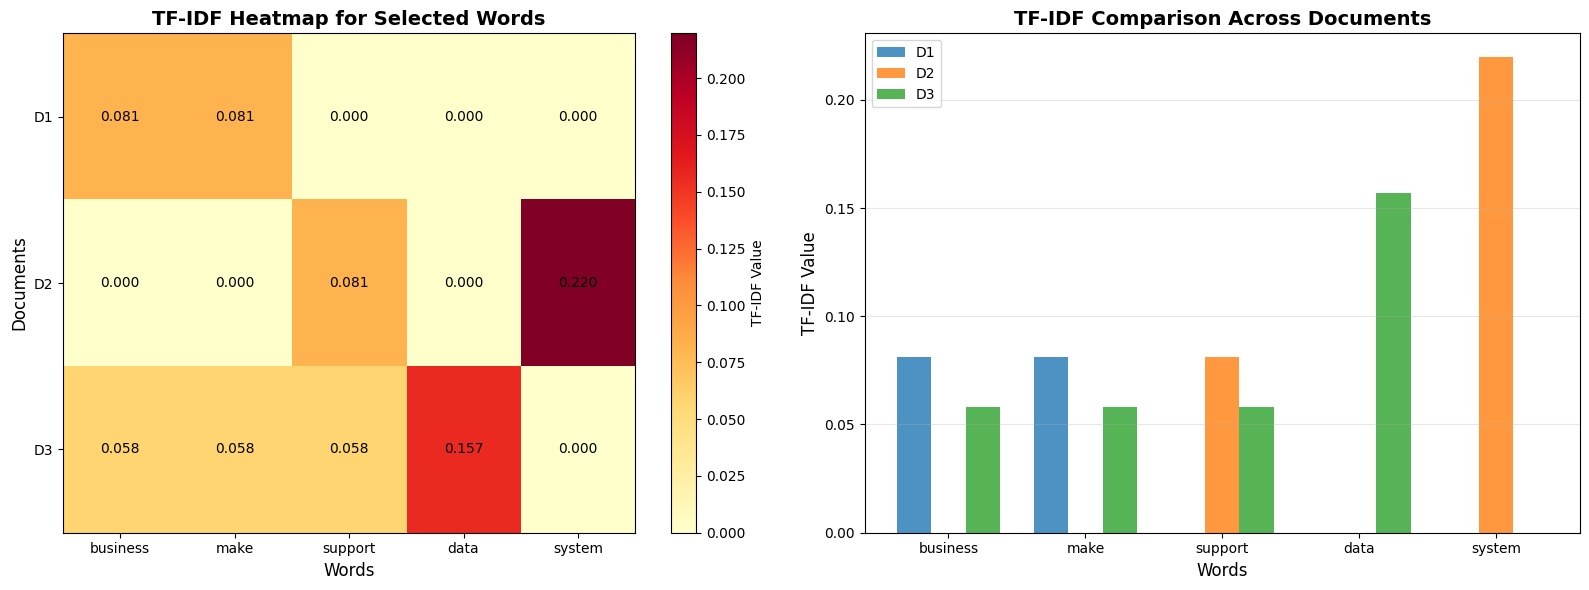


Visualization shows:
• Hotter colors (red) indicate higher TF-IDF values
• 'support', 'data', and 'system' show high distinctiveness in specific documents
• 'business' and 'make' have lower values due to appearing in multiple documents


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for visualization
words = selected_words
doc_ids = ['D1', 'D2', 'D3']

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: TF-IDF Heatmap
tfidf_values = np.array([[tfidf_matrix[doc][word] for word in words] for doc in doc_ids])

im1 = axes[0].imshow(tfidf_values, cmap='YlOrRd', aspect='auto')
axes[0].set_xticks(np.arange(len(words)))
axes[0].set_yticks(np.arange(len(doc_ids)))
axes[0].set_xticklabels(words)
axes[0].set_yticklabels(doc_ids)
axes[0].set_title('TF-IDF Heatmap for Selected Words', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Words', fontsize=12)
axes[0].set_ylabel('Documents', fontsize=12)

# Add values to heatmap
for i in range(len(doc_ids)):
    for j in range(len(words)):
        text = axes[0].text(j, i, f'{tfidf_values[i, j]:.3f}',
                           ha="center", va="center", color="black", fontsize=10)

plt.colorbar(im1, ax=axes[0], label='TF-IDF Value')

# Plot 2: Grouped Bar Chart
x = np.arange(len(words))
width = 0.25

bars1 = axes[1].bar(x - width, [tfidf_matrix['D1'][w] for w in words], width, label='D1', alpha=0.8)
bars2 = axes[1].bar(x, [tfidf_matrix['D2'][w] for w in words], width, label='D2', alpha=0.8)
bars3 = axes[1].bar(x + width, [tfidf_matrix['D3'][w] for w in words], width, label='D3', alpha=0.8)

axes[1].set_xlabel('Words', fontsize=12)
axes[1].set_ylabel('TF-IDF Value', fontsize=12)
axes[1].set_title('TF-IDF Comparison Across Documents', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(words)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVisualization shows:")
print("• Hotter colors (red) indicate higher TF-IDF values")
print("• 'support', 'data', and 'system' show high distinctiveness in specific documents")
print("• 'business' and 'make' have lower values due to appearing in multiple documents")